<a href="https://colab.research.google.com/github/nischalp114/MSCS_634_Lab_5/blob/main/Wine_Clustering_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Clustering Lab
**Name**: Nischal Pokharel
**Course**: MSCS 634  
**Lab**: Hierarchical and DBSCAN Clustering on Wine Dataset

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [2]:
# Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
labels_hier = hierarchical.fit_predict(X_scaled)

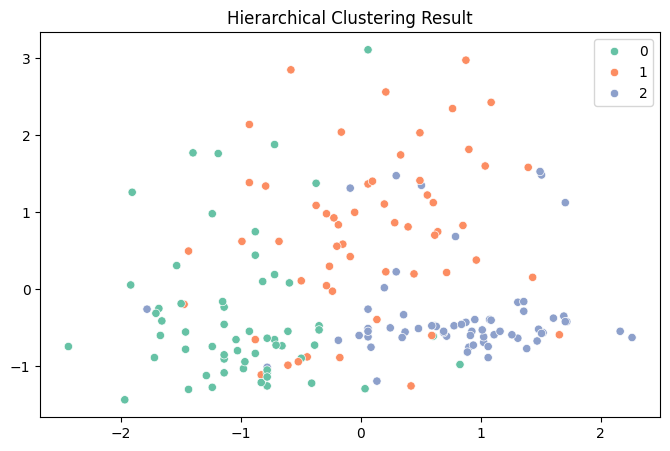

In [6]:
# Visualize clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels_hier, palette='Set2')
plt.title('Hierarchical Clustering Result')
plt.show()

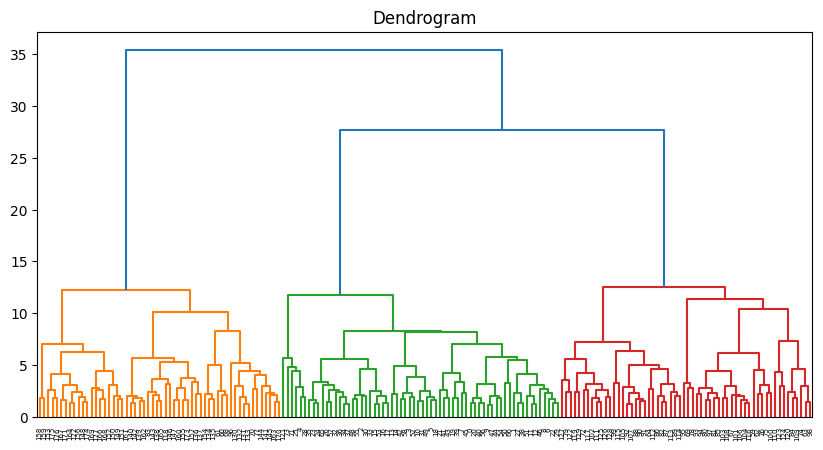

In [7]:
# Dendrogram for Hierarchical Clustering
linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.show()

In [8]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

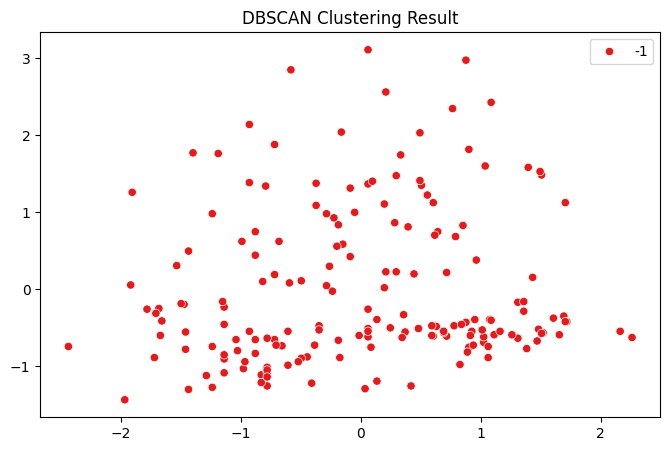

In [9]:
# Visualize DBSCAN clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels_dbscan, palette='Set1')
plt.title('DBSCAN Clustering Result')
plt.show()

In [10]:
# Evaluation Metrics
silhouette = silhouette_score(X_scaled, labels_hier)
print('Silhouette Score (Hierarchical):', silhouette)
homogeneity = homogeneity_score(wine.target, labels_hier)
print('Homogeneity Score (Hierarchical):', homogeneity)
completeness = completeness_score(wine.target, labels_hier)
print('Completeness Score (Hierarchical):', completeness)

Silhouette Score (Hierarchical): 0.2774439826952266
Homogeneity Score (Hierarchical): 0.790429271831654
Completeness Score (Hierarchical): 0.7825408201875712
